# Imports

In [33]:
import pandas as pd
import json
from matplotlib import pyplot as plt
%matplotlib inline

# FUNCTIONS

In [34]:
def get_heartrate(value):
    """
    Function used with .apply on the value series to extract the resting heart rate.
    """
    dict = json.loads(value) 
    try:
        rhr = dict['restingHeartRate']
        return rhr
    except:
        return None


# CODE

## Read in csv file containing heart rate data.

In [35]:
df = pd.read_csv("resting_heartrate.csv")
df

,dateTime,value
0,2020-12-27,"{'customHeartRateZones': [], 'heartRateZones':..."
1,2020-12-28,"{'customHeartRateZones': [], 'heartRateZones':..."
2,2020-12-29,"{'customHeartRateZones': [], 'heartRateZones':..."
3,2020-12-30,"{'customHeartRateZones': [], 'heartRateZones':..."
4,2020-12-31,"{'customHeartRateZones': [], 'heartRateZones':..."
5,2021-01-01,"{'customHeartRateZones': [], 'heartRateZones':..."
6,2021-01-02,"{'customHeartRateZones': [], 'heartRateZones':..."
7,2021-01-03,"{'customHeartRateZones': [], 'heartRateZones':..."
8,2021-01-04,"{'customHeartRateZones': [], 'heartRateZones':..."


## Convert to JSON

In [36]:
df['value'] = df['value'].str.replace("'",'"')
df['value']

0    {"customHeartRateZones": [], "heartRateZones":...
1    {"customHeartRateZones": [], "heartRateZones":...
2    {"customHeartRateZones": [], "heartRateZones":...
3    {"customHeartRateZones": [], "heartRateZones":...
4    {"customHeartRateZones": [], "heartRateZones":...
5    {"customHeartRateZones": [], "heartRateZones":...
6    {"customHeartRateZones": [], "heartRateZones":...
7    {"customHeartRateZones": [], "heartRateZones":...
8    {"customHeartRateZones": [], "heartRateZones":...
Name: value, dtype: object

## Build x/y dataframe where index is datetime and column is resting heartrate.

In [37]:
df['rhr'] = df['value'].apply(get_heartrate)
df = df.drop(['value'],axis=1)
df['dateTime'] = pd.to_datetime(df['dateTime'])
df.set_index(['dateTime'],inplace=True)
df

,rhr
dateTime,
2020-12-27,76
2020-12-28,76
2020-12-29,74
2020-12-30,72
2020-12-31,70
2021-01-01,67
2021-01-02,65
2021-01-03,67
2021-01-04,65


## Plot resting heartrate
See Youtube video: https://www.youtube.com/watch?v=G5TrCBgox1A

<AxesSubplot:xlabel='dateTime'>

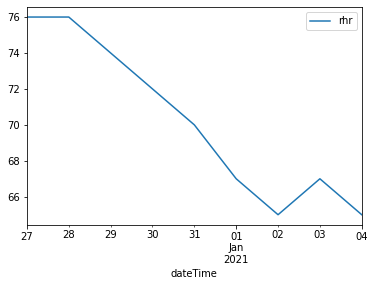

In [38]:
df.plot()